In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('cleaned_housing_training_data.csv')

In [3]:
train.shape

(1457, 222)

In [4]:
'SalePrice' in list(train.columns)

True

In [5]:
y_train = train['SalePrice']
del train['SalePrice']

In [6]:
y_train.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [7]:
y_train

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1452    12.072541
1453    12.254863
1454    12.493130
1455    11.864462
1456    11.901583
Name: SalePrice, Length: 1457, dtype: float64

## Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train, y_train)

y_train_pred = lr.predict(train)

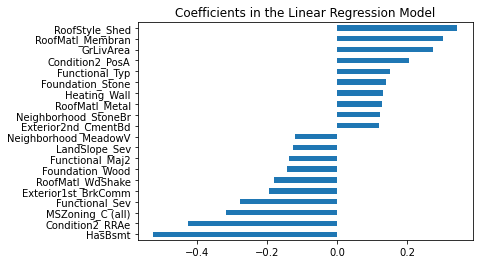

In [9]:
coefs = pd.Series(list(lr.coef_), index=train.columns)

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")

plt.title("Coefficients in the Linear Regression Model")
plt.show()

### Lasso Regression

In [10]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

Best alpha : 0.0003


In [11]:
print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

Try again for more precision with alphas centered around 0.0003
Best alpha : 0.000285


Lasso picked 110 features and eliminated the other 111 features


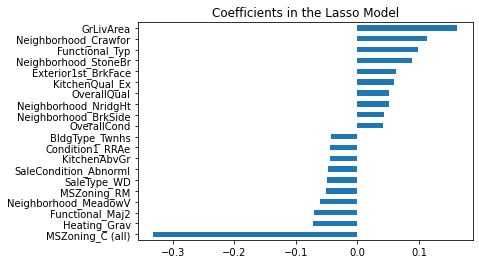

In [12]:
# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [27]:
# What are the dropped coefficients? We will need this to create the writeup
pd.DataFrame(coefs[(coefs == 0)]).index.values

array(['TotalBsmtSF', 'BsmtHalfBath', 'HasBsmt', 'MSZoning_RH',
       'LotShape_IR1', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk',
       'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub',
       'Utilities_NoSeWa', 'LotConfig_FR3', 'LotConfig_Inside',
       'LandSlope_Gtl', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_CollgCr',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Timber', 'Condition1_Feedr', 'Condition1_PosA',
       'Condition1_PosN', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn',
       'BldgType_Duplex', 'BldgType_TwnhsE', 'HouseStyle_1.5Fin',
       'HouseStyle_1.5Unf', 'H

### Decision Tree Regression

In [14]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(train, y_train)

DecisionTreeRegressor(max_depth=3)

''

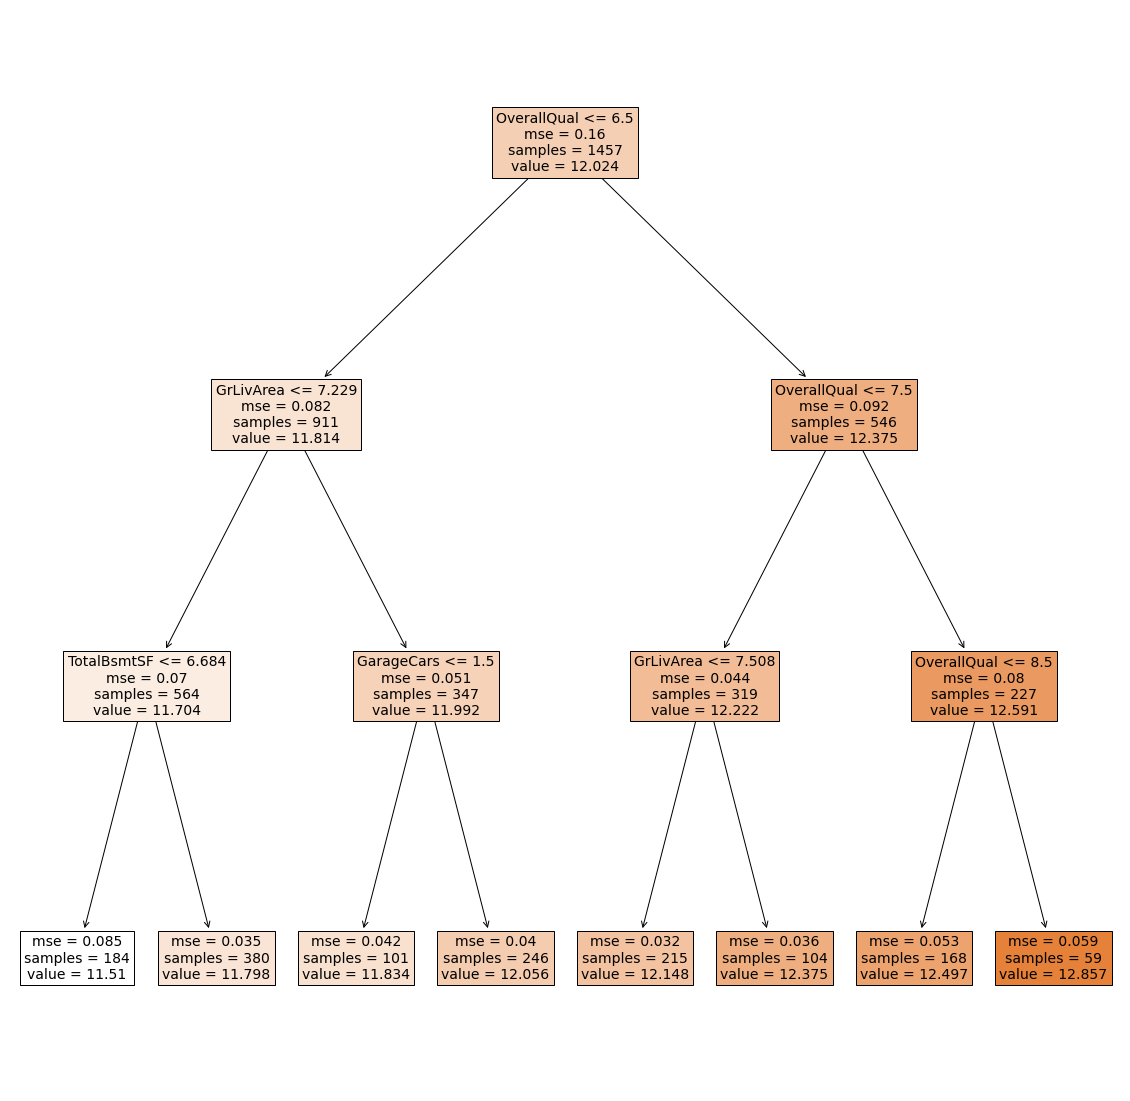

In [15]:
fig = plt.figure(figsize=(20, 20))
plot_tree(dtr, feature_names=train.columns, fontsize=14, filled=True)
''

### Random Forest Regression

In [16]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth=2, random_state=0)
rfr.fit(train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

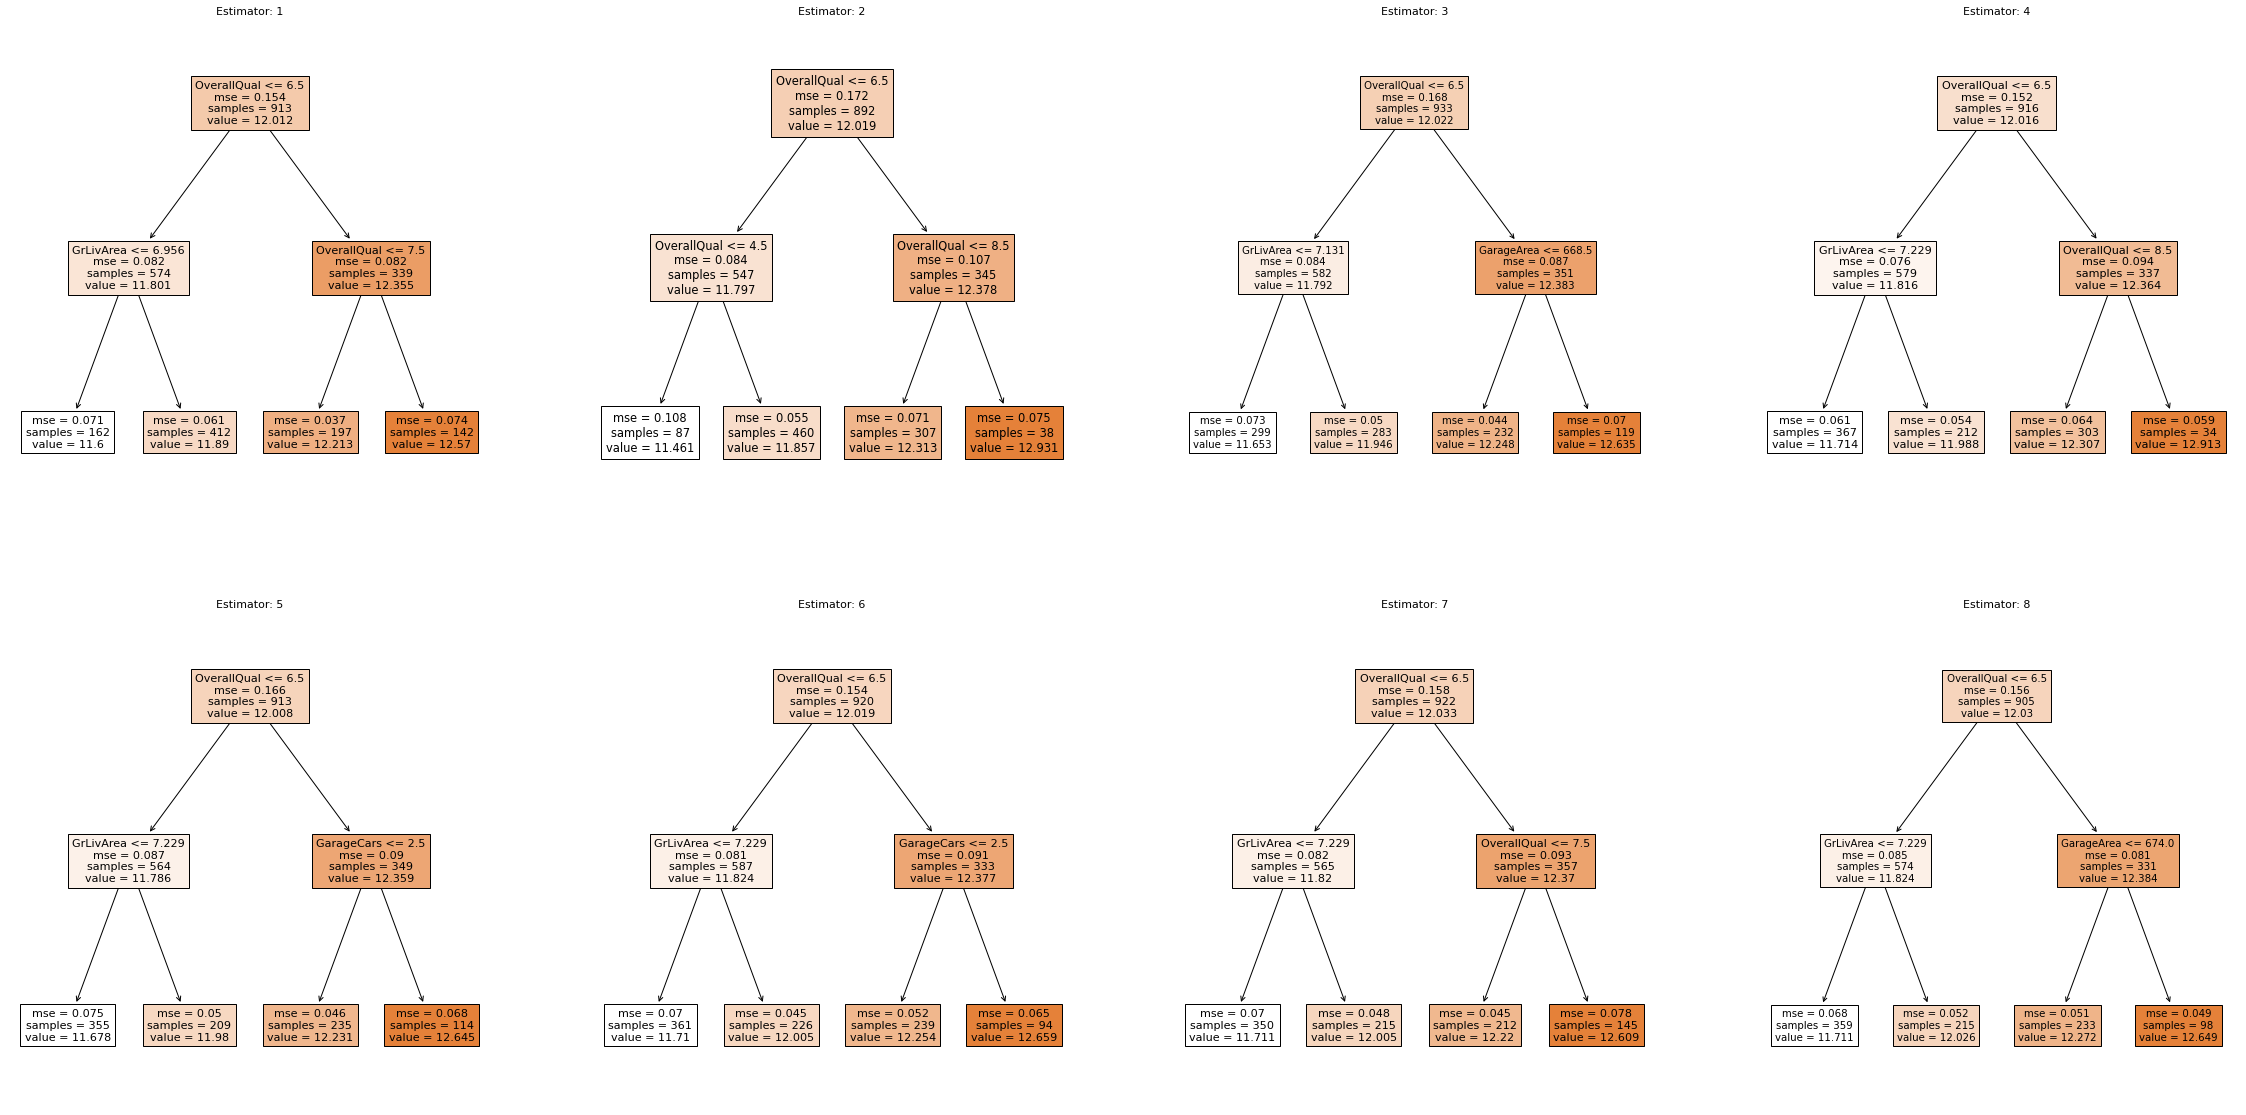

In [17]:
rows = 2
cols = 4

fig, axes = plt.subplots(nrows = rows,ncols = cols,figsize = (cols*10,rows*10))
for index in range(0, rows*cols):
    row = int(index / cols)
    col = index - row*cols
    plot_tree(rfr.estimators_[index],
               feature_names = train.columns, 
               filled = True,
               ax = axes[row, col]);

    axes[row, col].set_title('Estimator: ' + str(index + 1), fontsize = 11)

### k-NN Regression

In [18]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=2)

knn.fit(train, y_train)

NearestNeighbors(n_neighbors=2)